In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 


#Some code to beautify the plots
plt.rcParams['figure.figsize'] = [10, 5]
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

## Monte Carlo integration

Suppose we want to integrate $g(x)$ in the interval $[0,1]$. We can write this as 

$$ I = \int_0^1 g(x) dx =  E[g(X)] ,$$

where $X \sim \text{Uniform}(0,1)$. We can use the Monte Carlo Estimate 

$$ I_N = \frac1N\sum_{j=1}^N g(X_i) \qquad X_i \sim \text{Uniform}(0,1). $$ 

The Central Limit Theorem (CLT) says that 
  $$ \lim_{N\rightarrow \infty} P \left( \sqrt{N}\frac{I_N-I}{\sigma} \leq a\right) = \Phi(a) := \int_{-\infty}^a \frac{e^{-z^2/2}}{\sqrt{2\pi}} dz,$$
where 

$$ \sigma^2 = \int_0^1 g^2(x) dx - \left(\int_0^1 g(x) dx\right)^2.$$


As a first example, we take $g(x) = \exp(\cos(20*x))$.  Let us plot this function and compute the integrals using numerical quadrature

('The numerical integral is ', 1.3224234206833634, ' and the variance is ', 0.6981624545912566)


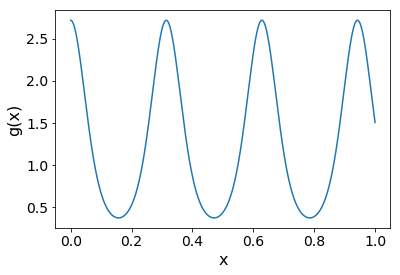

In [2]:
x = np.linspace(0,1,1000)

g = lambda x: np.exp(np.cos(20*x))
plt.plot(x, g(x))
plt.xlabel('x', fontsize = 16)
plt.ylabel('g(x)', fontsize = 16)

# Compute true integral
from scipy.integrate import quad
I,err = quad(g, 0,1)

#Compute variance 
I2,err = quad(lambda x: g(x)**2., 0,1)
V  = I2- I**2.

print("The numerical integral is ", I, " and the variance is ", V)

### Compute Monte Carlo estimate

We compute the Monte Carlo estimate using $100$ samples. Note that we get a different answer each time we run the code.

('The Monte Carlo estimate is ', 1.3276736179449566)


Text(0,0.5,'g(x)')

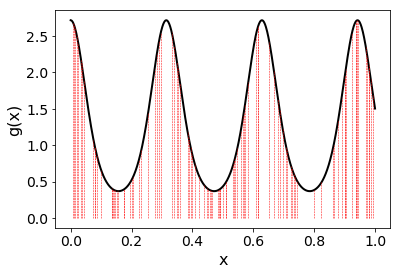

In [3]:
X = np.random.rand(100)  # 1000 samples
Imc = np.mean(g(X))
print("The Monte Carlo estimate is ", Imc)

x = np.linspace(0,1,1000)
plt.plot(x, g(x), 'k-', linewidth = 2.0)
for k in range(X.size):
    plt.plot(X[k]*np.ones((100,)), np.linspace(0,g(X[k]),100), 'r--', lw = 0.5)
plt.xlabel('x', fontsize = 16)
plt.ylabel('g(x)', fontsize = 16)


### Compute the error with the number of samples

In [4]:
nlst = 10**np.arange(1,7)
X = np.random.rand(10**6)    

Imc = np.zeros((nlst.size,),  dtype = 'd')
for j,n in enumerate(nlst):
    Imc[j] = np.mean(g(X[:n]))
    
err = np.abs(Imc-I)/np.abs(I)

Text(0.5,1,'Error in Monte Carlo estimator')

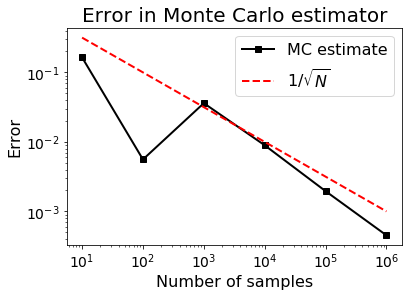

In [5]:
plt.loglog(nlst,err, 'ks-', linewidth = 2.0)
plt.loglog(nlst,1./np.sqrt(nlst), 'r--', lw = 2.0)
plt.xlabel('Number of samples', fontsize = 16)
plt.ylabel('Error', fontsize = 16)
plt.legend({'MC estimate','$1/\sqrt{N}$'}, fontsize = 16)
plt.title('Error in Monte Carlo estimator', fontsize = 20)

### Prediction of the CLT

The CLT says that if $N$, is sufficiently large, then $I_N$ is approximately normal. We see how good this approximation is.

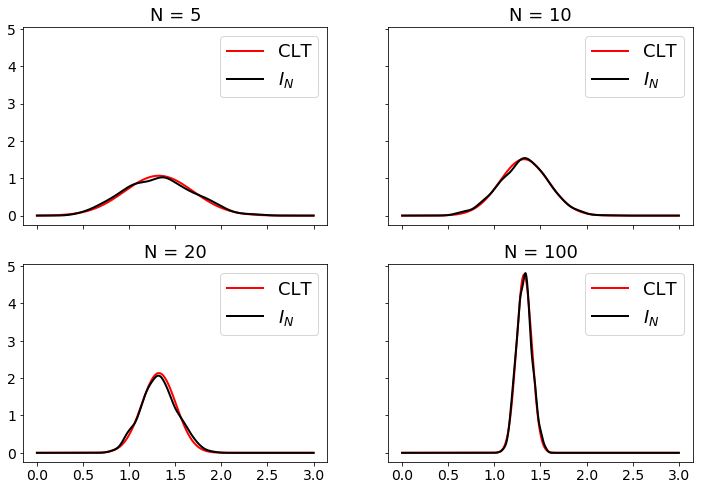

In [6]:
from scipy.stats import norm, gaussian_kde

ns = 1000
nlst = [5, 10, 20,100]

x = np.linspace(0,3,1000)
f, axarray = plt.subplots(2,2, sharex = True, sharey = True, figsize = (12,8))
for ax, n in zip(axarray.flatten(), nlst):
    
    Imc = np.zeros((ns,),dtype = 'd')
    for j in range(ns):
        X = np.random.rand(n)
        Imc[j] =  np.mean(g(X))
    
    kde = gaussian_kde(Imc)
    
    
    rv = norm(I,np.sqrt(V/n))
    ax.plot(x, rv.pdf(x), 'r-', lw=2)
    ax.plot(x,kde.evaluate(x), 'k-', lw = 2)
    ax.legend(('CLT','$I_N$ '), fontsize = 18)
    ax.set_title('N = ' + str(n), fontsize = 18)

### Integration over a domain $[a,b]$


Suppose we extend our approach to compute the integral 
$$  I = \int_a^b g(x) dx \qquad -\infty < a < b < \infty.$$
We can write this integral as an expectation
$$ I = (b-a) E[g(X)], $$
where $X \sim \text{Uniform}(a,b)$. We can use the Monte Carlo Estimate 

$$ I_N = \frac1N\sum_{j=1}^N g(X_i) \qquad X_i \sim \text{Uniform}(a,b). $$ 



We now integrate the function $g(x) = \exp(\cos(20x))$ in the range [-1,3]. 

('The numerical integral is ', 5.106802833475581)


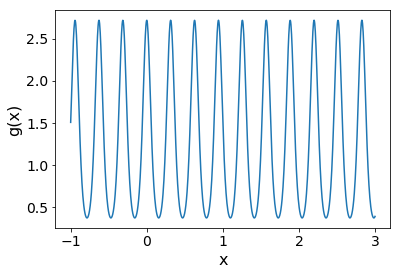

In [7]:
a = -1
b = 3

x = np.linspace(a,b,1000)

g = lambda x: np.exp(np.cos(20*x))
plt.plot(x, g(x))
plt.xlabel('x', fontsize = 16)
plt.ylabel('g(x)', fontsize = 16)

# Compute true integral
from scipy.integrate import quad
I,err = quad(g, a, b, epsrel = 1.e-4)

print("The numerical integral is ", I)

Text(0.5,1,'Error in Monte Carlo estimator')

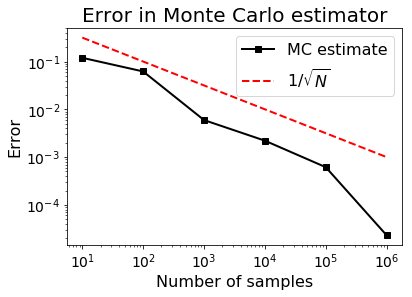

In [8]:
nlst = 10**np.arange(1,7)
X = (b-a)*np.random.rand(10**6) + a  

Imc = np.zeros((nlst.size,),  dtype = 'd')
for j,n in enumerate(nlst):
    Imc[j] = (b-a)*np.mean(g(X[:n]))
    
err = np.abs(Imc-I)/np.abs(I)

plt.loglog(nlst,err, 'ks-', linewidth = 2.0)
plt.loglog(nlst,1./np.sqrt(nlst), 'r--', lw = 2.0)
plt.xlabel('Number of samples', fontsize = 16)
plt.ylabel('Error', fontsize = 16)
plt.legend({'MC estimate','$1/\sqrt{N}$'}, fontsize = 16)
plt.title('Error in Monte Carlo estimator', fontsize = 20)